In [2]:
"https://ukamnads.icu/api/v2/channel?uId=7706705&includeExtra=true"
import requests
import csv
import json
import datetime
import pandas as pd
import os
import time
import matplotlib.pyplot as plt
import seaborn as sns
import pynimate as nim
import matplotlib
import re
import matplotlib.font_manager as font_manager
matplotlib.use("TkAgg")

In [2]:
def url2json(url):
    u_response = requests.get(url)
    u_json_data = u_response.json()
    return u_json_data


def watch_data_channels(uid, page=0):
    url = f"https://ukamnads.icu/api/v2/channel?uId=" + str(uid) + "&includeExtra=true"
    return url2json(url)['data']

In [3]:
def uid_search_channels(uid):
    ##  定义key, type0为评论，2为消费，4为进场消息
    keys = ['title', 'cParentArea', 'cArea', 'startDate','stopDate','totalTime','danmakusCount', 'totalIncome', 'watchCount','likeCount','payCount','maxOnlineCount']
    df = pd.DataFrame(columns=keys)
    w_data = watch_data_channels(uid)

    file_name = str(uid)+w_data['channel']['uName'] + ".csv"
    folder_name = "channels"

    current_directory = os.getcwd()
    folder_path = os.path.join(current_directory, folder_name)
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
    file_path = os.path.join(folder_path, file_name)

    records = w_data['lives']
    # 依次遍历每一页的每一条
    for record in records:
        row = {}
        row['cParentArea'] = record.get('parentArea', '')
        row['cArea'] = record.get('area', '')
        for key in keys:
            if key in record:
                row[key] = record[key]
        row['startDate'] = d2d(row['startDate'])
        row['stopDate'] = d2d(row['stopDate'])
        row['totalTime'] = (row['stopDate'] - row['startDate'])
        if row['stopDate']<row['startDate'] :
            continue
        df = pd.concat([df, pd.DataFrame(row, index=[0])], ignore_index=True)
    df.to_csv(file_path, index=False)

    key0 = ['follower','time']
    key1 = ['guardNum','time']
    ex_data = w_data['extra']
    ex = pd.DataFrame(columns=key0)
    for record in ex_data['fansHistory']:
        row = {}
        for key in key0:
            if key in record:
                row[key] = record[key]
        row['time'] = d2d(row['time']).date()
        ex = pd.concat([ex, pd.DataFrame(row, index=[0])], ignore_index=True)
    ex.drop_duplicates(subset='time', keep='last', inplace=True)
    file_path = os.path.join(folder_path, w_data['channel']['uName']+'followerHistory.csv')
    ex.to_csv(file_path, index=False)

    ex = pd.DataFrame(columns=key1)
    for record in ex_data['guardHistory']:
        row = {}
        for key in key1:
            if key in record:
                row[key] = record[key]
        row['time'] = d2d(row['time'])
        ex = pd.concat([ex, pd.DataFrame(row, index=[0])], ignore_index=True)
    file_path = os.path.join(folder_path, w_data['channel']['uName']+'guardNumHistory.csv')
    ex.to_csv(file_path, index=False)

    return df

In [4]:
def d2d(d):
    timestamp_str = float(d)  # 将字符串转换为整数或浮点数（如果是浮点数时间戳）
    timestamp = float(timestamp_str) / 1000  # 转换为以秒为单位的时间戳 # 使用 datetime 模块将时间戳转换为标准时间
    dt = datetime.datetime.fromtimestamp(timestamp)  # 打印标准时间 print(dt)
    return dt
def extract_file_name(filename):
    pattern = r'^\d+_(.*?)_followerHistory$'
    match = re.search(pattern, filename)
    if match:
        return match.group(1)
    else:
        return None

In [5]:
# 嘉然 阿梓 七海 tf 罕见 bella
sUids = {672328094,434334701,7706705,1265680561,1437582453,672353429}
sUid = 434334701
sUids = {8739477,351686170,1811071010,51628309,2132180406,401480763}

In [6]:
for uid in sUids:
    uid_search_channels(uid)

In [66]:
w_data = watch_data_channels(7706705)['extra']
w_data

{'fansHistory': [{'archiveView': 2013283,
   'follower': 96079,
   'time': 1594896536717},
  {'archiveView': 2014921, 'follower': 96080, 'time': 1595011780523},
  {'archiveView': 2016520, 'follower': 96086, 'time': 1595127461179},
  {'archiveView': 2019857, 'follower': 96085, 'time': 1595219304456},
  {'archiveView': 2021162, 'follower': 96049, 'time': 1595332787238},
  {'archiveView': 2025424, 'follower': 96032, 'time': 1595392687620},
  {'archiveView': 2025424, 'follower': 95996, 'time': 1595429308820},
  {'archiveView': 2028064, 'follower': 95989, 'time': 1595484426925},
  {'archiveView': 2029875, 'follower': 95977, 'time': 1595600416767},
  {'archiveView': 2031403, 'follower': 95978, 'time': 1595728554141},
  {'archiveView': 2033733, 'follower': 95961, 'time': 1595824498557},
  {'archiveView': 2034894, 'follower': 95964, 'time': 1595941440314},
  {'archiveView': 2035874, 'follower': 95941, 'time': 1596061935307},
  {'archiveView': 2037808, 'follower': 95921, 'time': 1596178418991},

In [6]:
def line(kind,uid):
    folder_path = os.path.join(os.getcwd(), "channels")
    file_path = os.path.join(folder_path, str(uid)+kind+"History.csv")
    df = pd.read_csv(file_path)
    df['time'] = pd.to_datetime(df['time'])
    print(df)

    sns.set_palette("Set2")

    plt.plot(df['time'], df[kind])
    plt.xlabel('Time')
    plt.ylabel(kind+' Count')
    plt.title(kind+' Count Over Time')
    plt.xticks(rotation=45)
    plt.show()

       follower                    time
0          2298 2020-12-03 16:04:35.615
1          2303 2020-12-03 17:34:59.863
2          2306 2020-12-03 19:14:37.989
3          2309 2020-12-03 21:49:30.652
4          2313 2020-12-04 00:32:28.056
...         ...                     ...
26197   1771567 2023-07-19 08:30:06.970
26198   1771524 2023-07-19 09:39:56.154
26199   1771487 2023-07-19 10:26:05.394
26200   1771449 2023-07-19 11:54:56.151
26201   1771413 2023-07-19 13:03:57.223

[26202 rows x 2 columns]


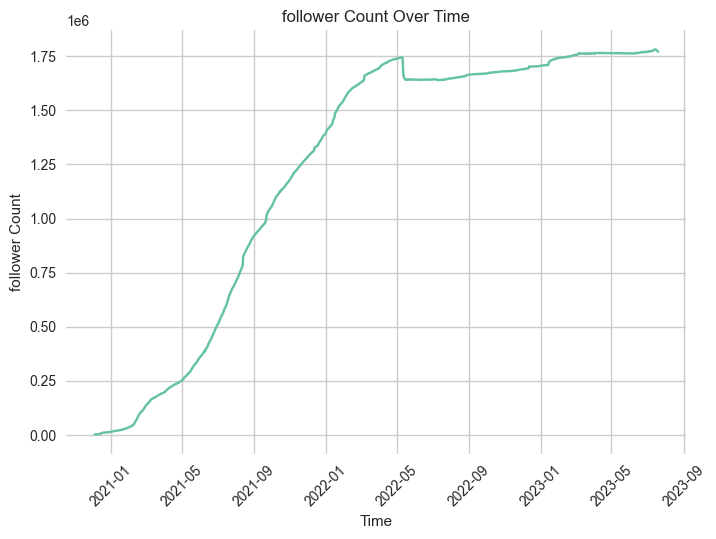

In [47]:
line("follower",sUid)

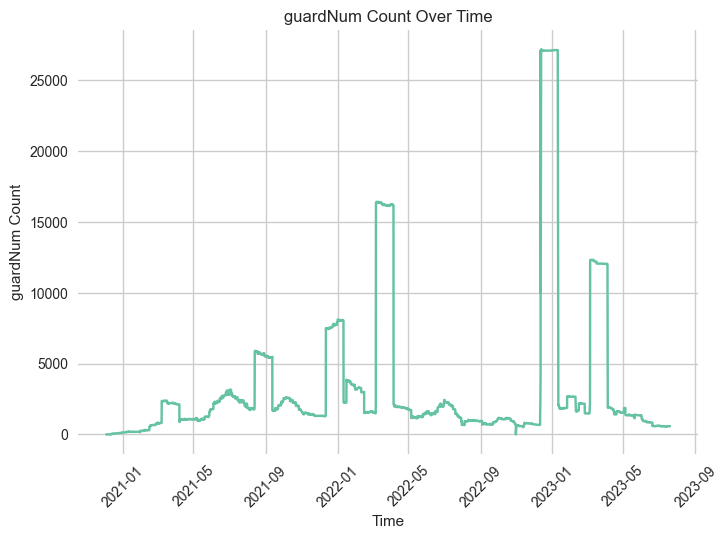

In [43]:
line("guardNum",sUid)

In [3]:
# 合并成总表
folder_path = './channels/'

files = [file for file in os.listdir(folder_path) if file.endswith('followerHistory.csv')]

start_date = '2020-07-01'
end_date = '2023-07-19'

date_range = pd.date_range(start=start_date, end=end_date, freq='D')

merged_data = pd.DataFrame(index=date_range)
merged_data.index.name = 'time'
merged_data.index = merged_data.index.strftime('%Y-%m-%d')


for file in files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)
    df=df.set_index('time')
    # 提取中文
    column_name = re.search(r'(.*)(?=followerHistory)', file).group()
    # column_name = ''.join(filter(str.isdigit, file))
    df = df.rename(columns={'follower':column_name})
    merged_data = merged_data.merge(df, left_index=True, right_index=True,how='outer',)
merged_data = merged_data.ffill()
merged_data.to_csv('./m.csv', index=True)

print(merged_data)

            七海Nana7mi    嘉然今天吃什么  小妹睡不醒      明前奶绿  東雪蓮Official      永雏塔菲  \
time                                                                       
2019-05-09        NaN        NaN    NaN       NaN          NaN       NaN   
2019-05-10        NaN        NaN    NaN       NaN          NaN       NaN   
2019-05-11        NaN        NaN    NaN       NaN          NaN       NaN   
2019-05-12        NaN        NaN    NaN       NaN          NaN       NaN   
2019-05-13        NaN        NaN    NaN       NaN          NaN       NaN   
...               ...        ...    ...       ...          ...       ...   
2023-07-17   989585.0  1774292.0    NaN  222951.0     530521.0  811521.0   
2023-07-18   989621.0  1771758.0    NaN  223023.0     531012.0  814082.0   
2023-07-19   989607.0  1770702.0    NaN  223059.0     531392.0  815106.0   
2023-07-20   989570.0  1770515.0    NaN  223079.0     531653.0  815649.0   
2023-07-21   989570.0  1770515.0    NaN  223079.0     531653.0  815649.0   

           

In [8]:
merged_data = pd.read_csv('m.csv')
merged_data = merged_data.set_index('time')
print(merged_data)
plt.rcParams['font.sans-serif']=['SimHei']


cnv = nim.Canvas()
bar = nim.Barplot(merged_data, "%Y-%m-%d", "2d")
bar.set_time(callback=lambda i, datafier: datafier.data.index[i].strftime("%b, %Y"))
cnv.add_plot(bar)
cnv.animate()
plt.show()
cnv.save("gif",24,"file")

            七海Nana7mi    嘉然今天吃什么  小妹睡不醒      明前奶绿  東雪蓮Official      永雏塔菲  \
time                                                                       
2019-05-09        NaN        NaN    NaN       NaN          NaN       NaN   
2019-05-10        NaN        NaN    NaN       NaN          NaN       NaN   
2019-05-11        NaN        NaN    NaN       NaN          NaN       NaN   
2019-05-12        NaN        NaN    NaN       NaN          NaN       NaN   
2019-05-13        NaN        NaN    NaN       NaN          NaN       NaN   
...               ...        ...    ...       ...          ...       ...   
2023-07-17   989585.0  1774292.0    NaN  222951.0     530521.0  811521.0   
2023-07-18   989621.0  1771758.0    NaN  223023.0     531012.0  814082.0   
2023-07-19   989607.0  1770702.0    NaN  223059.0     531392.0  815106.0   
2023-07-20   989570.0  1770515.0    NaN  223079.0     531653.0  815649.0   
2023-07-21   989570.0  1770515.0    NaN  223079.0     531653.0  815649.0   

           

MovieWriter ffmpeg unavailable; using Pillow instead.


ValueError: unknown file extension: .file

In [4]:
def counts(kind):
    # 合并成总表
    folder_path = './channels/c'

    files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

    date_range = pd.date_range(start='2021-01-31', end='2023-07-31', freq='M')
    merged_data = pd.DataFrame(index=date_range)
    merged_data.index.name = 'time'


    for file in files:
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path)
        df['startDate'] = pd.to_datetime(df['startDate']).dt.date
        df['startDate'] = pd.to_datetime(df['startDate'])
        df = df.set_index('startDate')
        df = df[[kind]]
        df = df.resample('M').sum()
        print(df)
        # 提取中文
        column_name = re.search(r'(.*)(?=.csv)', file).group()
        # column_name = ''.join(filter(str.isdigit, file))
        df = df.rename(columns={kind:column_name})
        df.to_csv('./channels/c/watch/'+column_name+'.csv',index=True)
        merged_data = merged_data.merge(df, left_index=True, right_index=True,how='outer',)
    # merged_data = merged_data.ffill()
    merged_data = merged_data.rename_axis('time')
    merged_data.to_csv('./mWatch.csv', index=True)

    print(merged_data.index)

In [5]:
def Animate(kind):
    merged_data = pd.read_csv('m'+kind+'.csv')
    merged_data = merged_data.set_index('time')
    plt.rcParams['font.sans-serif']=['SimHei']
    print(merged_data)

    cnv = nim.Canvas()
    bar = nim.Barplot(merged_data, "%Y-%m-%d", "1d")
    bar.set_time(callback=lambda i, datafier: datafier.data.index[i].strftime("%b, %Y"))
    cnv.add_plot(bar)
    cnv.animate()
    plt.show()
    cnv.save(kind, 24, "gif")

In [6]:
counts('watchCount')

            watchCount
startDate             
2020-11-30      158379
2020-12-31      265988
2021-01-31      410277
2021-02-28      392917
2021-03-31      363079
2021-04-30      134601
2021-05-31      188990
2021-06-30       80468
2021-07-31      605533
2021-08-31      688504
2021-09-30      540677
2021-10-31      581761
2021-11-30      504724
2021-12-31      711671
2022-01-31      918932
2022-02-28     1029195
2022-03-31     1394370
2022-04-30     1250808
2022-05-31     1270887
2022-06-30     2554678
2022-07-31     4512428
2022-08-31     3801080
2022-09-30     3079342
2022-10-31     2743082
2022-11-30     1830069
2022-12-31     2502285
2023-01-31     3734392
2023-02-28     2187339
2023-03-31     2134818
2023-04-30     1697538
2023-05-31     1801882
2023-06-30     1507759
2023-07-31     2678508
            watchCount
startDate             
2021-04-30       12861
2021-05-31       36765
2021-06-30      142191
2021-07-31      227605
2021-08-31      108809
2021-09-30       39724
2021-10-31 

In [7]:
Animate('Watch')

            1265680561永雏塔菲  1437582453東雪蓮Official  1811071010虞莫MOMO  \
time                                                                  
2020-02-29             NaN                    NaN               NaN   
2020-03-31             NaN                    NaN               NaN   
2020-04-30             NaN                    NaN               NaN   
2020-05-31             NaN                    NaN               NaN   
2020-06-30             NaN                    NaN               NaN   
2020-07-31             NaN                    NaN               NaN   
2020-08-31             NaN                    NaN               NaN   
2020-09-30             NaN                    NaN               NaN   
2020-10-31             NaN                    NaN               NaN   
2020-11-30        158379.0                    NaN               NaN   
2020-12-31        265988.0                    NaN               NaN   
2021-01-31        410277.0                    NaN               NaN   
2021-0

MovieWriter ffmpeg unavailable; using Pillow instead.


In [16]:
uid = "七海NaNa7mi"
kind = 'follower'
folder_path = os.path.join(os.getcwd(), "channels")
file_path = os.path.join(folder_path, str(uid)+kind+"History.csv")
df1 = pd.read_csv(file_path)
df1['time'] = pd.to_datetime(df1['time'])

sns.set_palette("Set2")


fig, ax1 = plt.subplots()
ax1.plot(df1['time'], df1[kind], label='Follower', color='blue')
ax1.set_xlabel('time')
ax1.set_ylabel(kind, color='blue')


kind = 'guardNum'
folder_path = os.path.join(os.getcwd(), "channels")
file_path = os.path.join(folder_path, str(uid)+kind+"History.csv")
df2 = pd.read_csv(file_path)
df2['time'] = pd.to_datetime(df2['time'])
ax2 = ax1.twinx()
ax2.plot(df2['time'], df2[kind], label='Guard', color='red')
ax2.set_ylabel(kind, color='red')

plt.xticks(rotation=45)
lines = [ax1.get_lines()[0], ax2.get_lines()[0]]
ax1.legend(lines, [line.get_label() for line in lines])
plt.title(' Count Over Time')
plt.show()